### COVID-19 Among Prisoners, Staff, and Civilians

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
complete_df = pd.read_csv('data_clean_complete.csv')

In [4]:
#removing federal
complete_df = complete_df[complete_df['name'] != 'Federal']
complete_df.head()

name state  staff_tests  total_staff_cases  staff_recovered  \
0  Alabama    AL          0.0                 11              0.0   
1  Alabama    AL          0.0                 42              0.0   
2  Alabama    AL          0.0                111             74.0   
3  Alabama    AL          0.0                125             82.0   
4  Alabama    AL          0.0                 62            110.0   

   total_staff_deaths  prisoner_tests  total_prisoner_cases  \
0                   0            61.0                     4   
1                   0            74.0                     7   
2                   1           177.0                    57   
3                   1           407.0                   131   
4                   0           990.0                   137   

   prisoners_recovered  total_prisoner_deaths  ...  \
0                  0.0                      1  ...   
1                  0.0                      0  ...   
2                 10.0                      6  ...   
3                 96.0                      8  ...   
4                190.0                      4  ...   

  Inmates participating in one or more work programs Prison industries  \
0                                               28.0               7.0   
1                                               28.0               7.0   
2                                               28.0               7.0   
3                                               28.0               7.0   
4                                               28.0               7.0   

   Support services  Farming  Public works  Other work programs   \
0              10.0       6.0          9.0                   5.0   
1              10.0       6.0          9.0                   5.0   
2              10.0       6.0          9.0                   5.0   
3              10.0       6.0          9.0                   5.0   
4              10.0       6.0          9.0                   5.0   

   No work programs  phone_rate_avg  Latitude  Longitude  
0               7.0             4.5     32.75     -86.75  
1               7.0             4.5     32.75     -86.75  
2               7.0             4.5     32.75     -86.75  
3               7.0             4.5     32.75     -86.75  
4               7.0             4.5     32.75     -86.75  

[5 rows x 45 columns]

In [5]:
top_ten_states = complete_df.groupby('name')['total_prisoner_deaths'].sum().sort_values( ascending = False)[:10]

In [6]:
top_ten_prison = pd.DataFrame(top_ten_states)

In [7]:
top_ten_prison.reset_index(inplace = True)

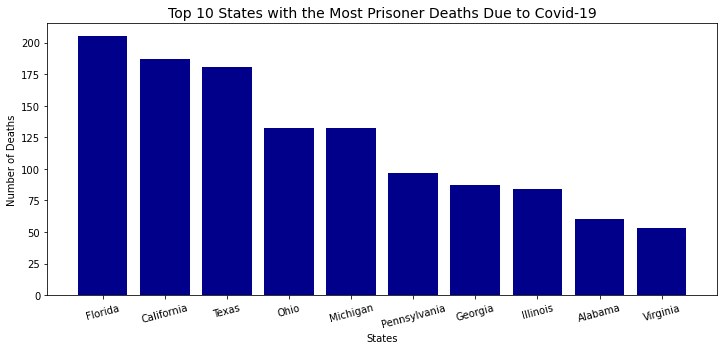

In [51]:
plt.figure(figsize = (12,5))
plt.tight_layout()
plt.bar(x = top_ten_prison['name'], height = top_ten_prison['total_prisoner_deaths'], color='darkblue')

plt.title('Top 10 States with the Most Prisoner Deaths Due to Covid-19', size = 14)

plt.xlabel('States', size = 10)
plt.ylabel('Number of Deaths', size = 10)
plt.xticks(rotation=15);
plt.savefig('top_ten_prison_states.png', dpi=300)
plt.show()

### Exploring Top 10 States with the most Staff Deaths

In [9]:
top_ten_staff_deaths = complete_df.groupby('name')['total_staff_deaths'].sum().sort_values( ascending = False)[:10]

In [10]:
top_ten_staff = pd.DataFrame(top_ten_staff_deaths)

In [11]:
top_ten_staff.reset_index(inplace = True)

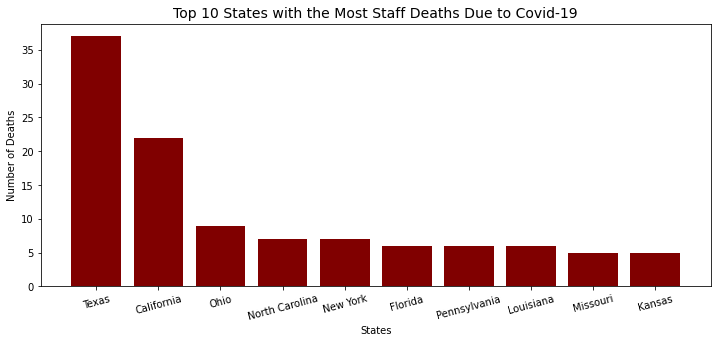

In [54]:
plt.figure(figsize = (12,5))
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)
plt.bar(x = top_ten_staff['name'], height = top_ten_staff['total_staff_deaths'], color='maroon')

plt.title('Top 10 States with the Most Staff Deaths Due to Covid-19', size = 14)

plt.xlabel('States', size = 10)
plt.ylabel('Number of Deaths', size = 10)
plt.xticks(rotation=15);
plt.savefig('top_ten_staff_states.png', dpi=300)
plt.show()

### Exploring Staff/Prisoner Cases

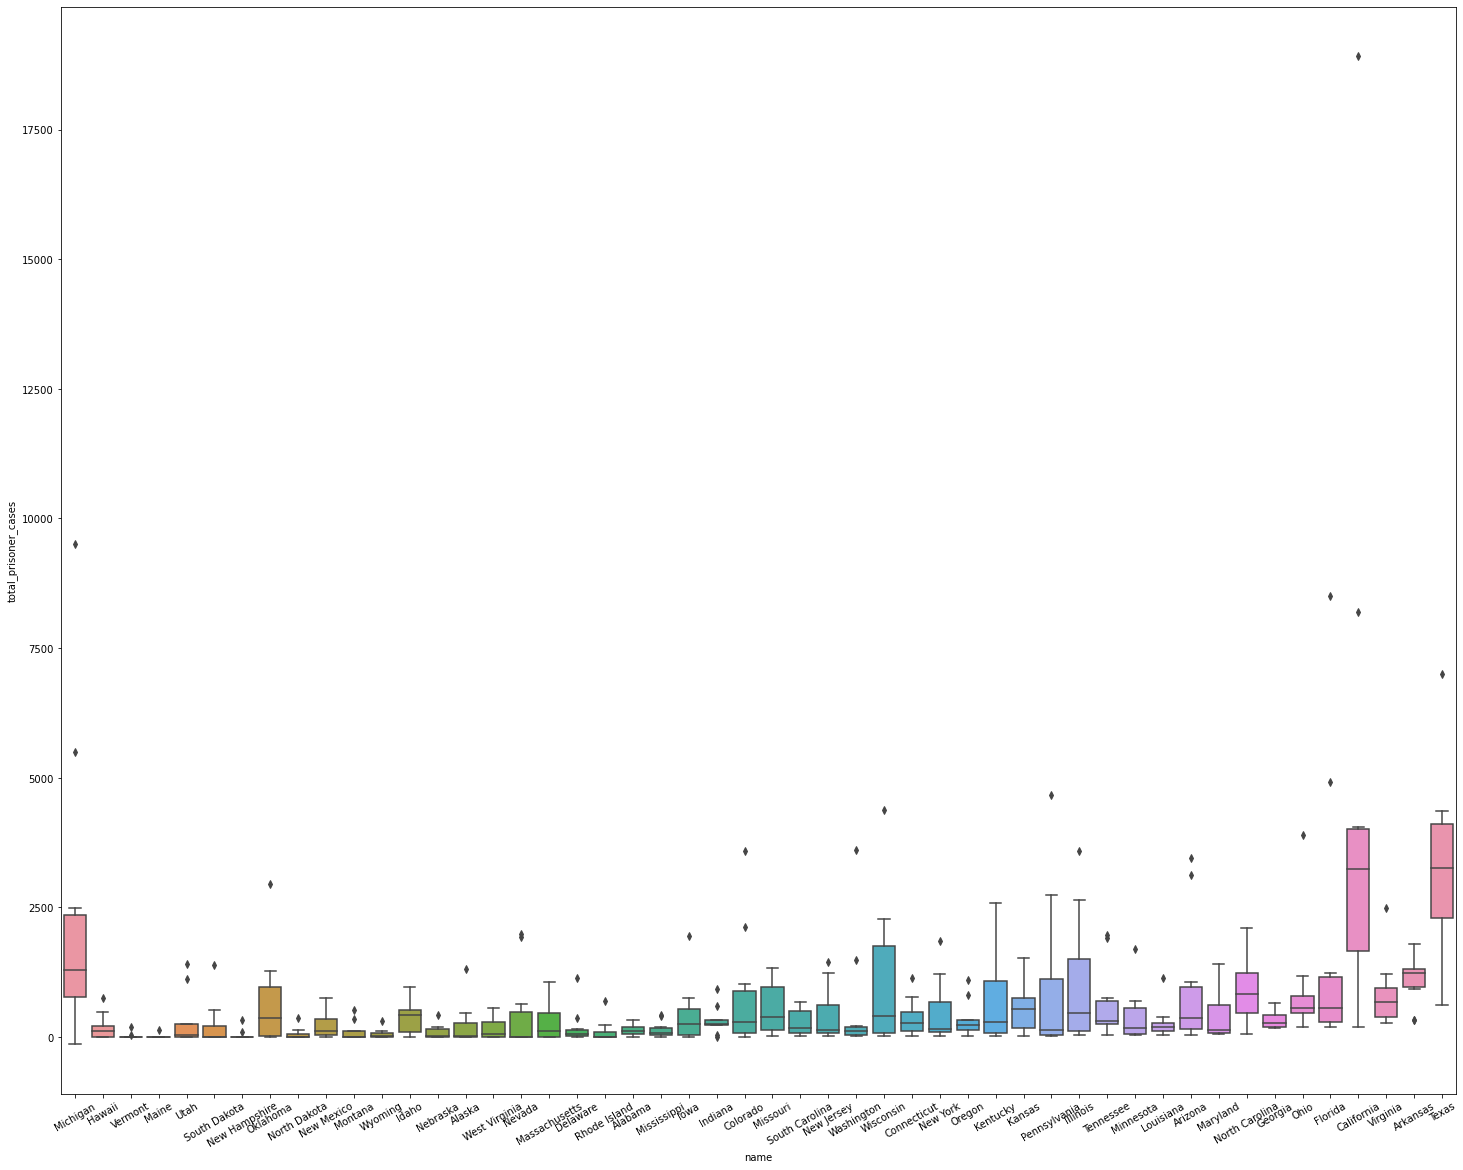

In [13]:
complete_df.sort_values(by= ['total_prisoner_cases'], ascending=[True], inplace= True)
plt.figure(figsize=(25,20))
sns.boxplot(data= complete_df, x = 'name', y = 'total_prisoner_cases');
plt.xticks(rotation=30);

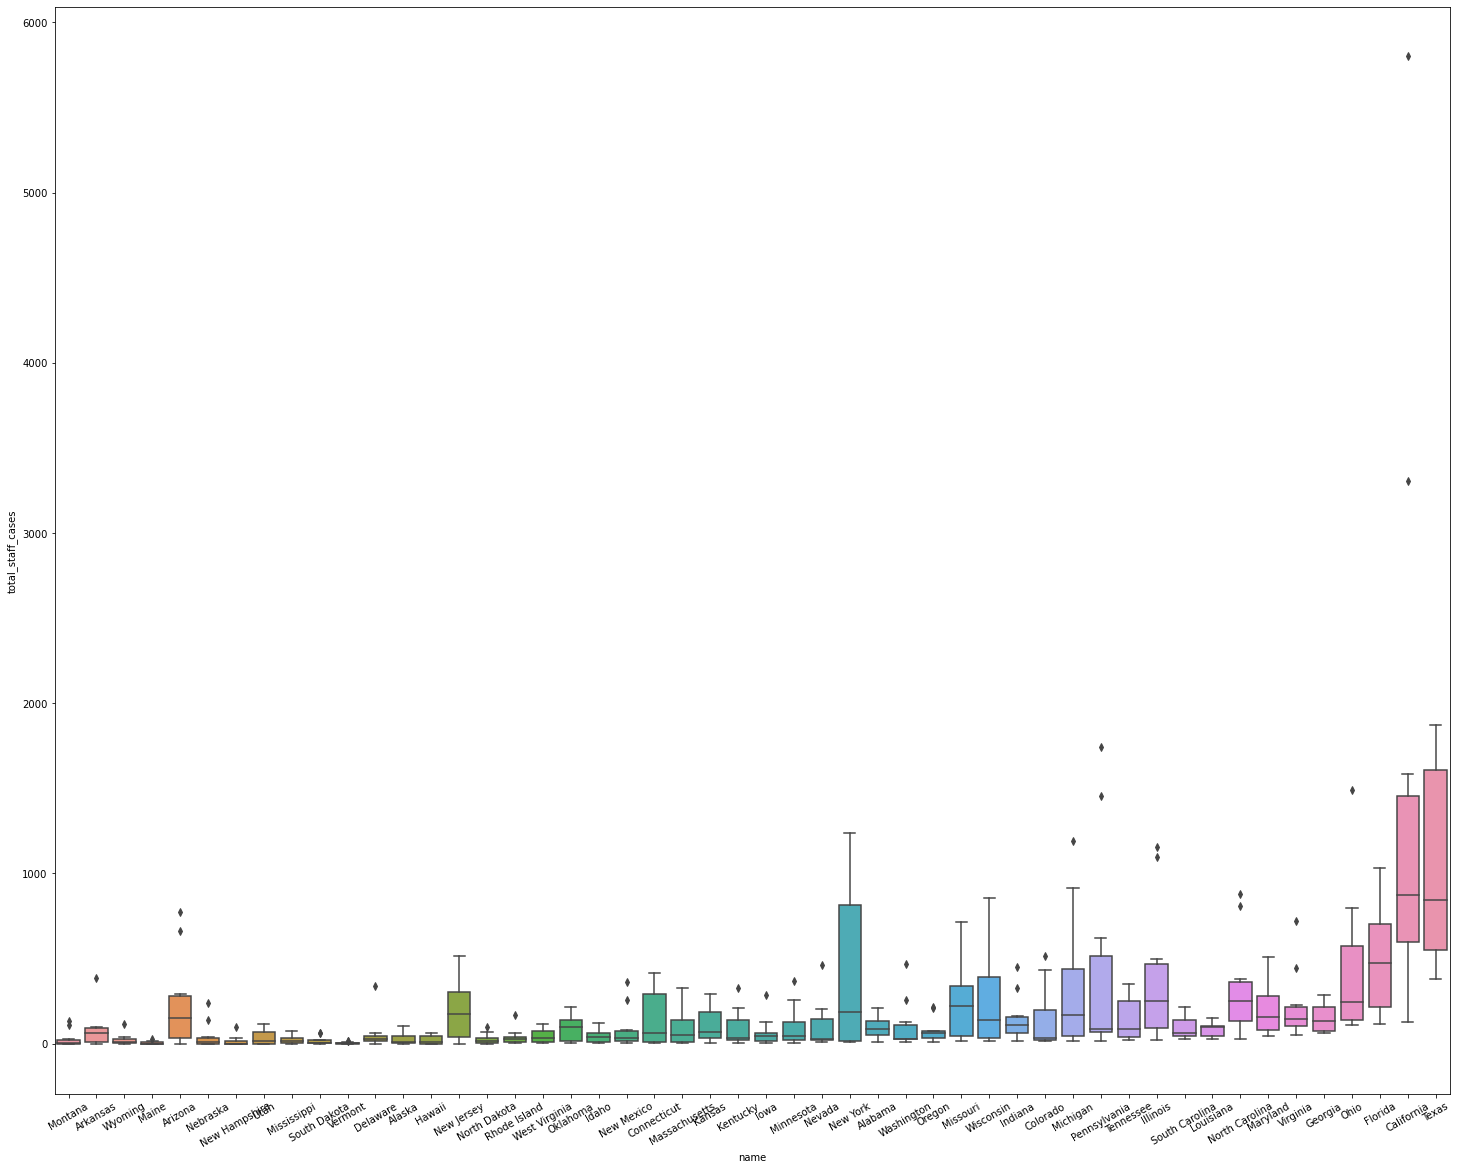

In [14]:
complete_df.sort_values(by= ['total_staff_cases'], ascending=[True], inplace= True)
plt.figure(figsize=(25,20))
sns.boxplot(data= complete_df, x = 'name', y = 'total_staff_cases');
plt.xticks(rotation=30);

We see an outlier in the state of California where the highest record of staff cases and prisoner cases due to covid-19 were 5,803 and 18,919, respectively. 

In [15]:
complete_df[(complete_df['name'] == 'California') & (complete_df['total_prisoner_cases'] > 18000)]

name state  staff_tests  total_staff_cases  staff_recovered  \
48  California    CA          NaN               5803           3259.0   

    total_staff_deaths  prisoner_tests  total_prisoner_cases  \
48                   1          5329.0                 18919   

    prisoners_recovered  total_prisoner_deaths  ...  \
48              13628.0                     35  ...   

   Inmates participating in one or more work programs Prison industries  \
48                                            77199.0              28.0   

    Support services  Farming  Public works  Other work programs   \
48              44.0       7.0         34.0                  29.0   

    No work programs  phone_rate_avg  Latitude  Longitude  
48              15.0            2.03     37.25    -119.75  

[1 rows x 45 columns]

In [16]:
staff_prisoner_df = pd.DataFrame(complete_df, columns = ['name', 'total_staff_cases', 'total_prisoner_cases'])

In [17]:
both_staff_prisoner_cases = staff_prisoner_df.groupby('name')[['total_staff_cases', 'total_prisoner_cases']].sum()

In [18]:
both_df = both_staff_prisoner_cases.sort_values(by='total_prisoner_cases', ascending = False)[:10]

In [19]:
both_p_and_s_df = pd.DataFrame(both_df)

In [20]:
both_p_and_s_df.reset_index(inplace=True)

In [21]:
both_p_and_s_df = both_p_and_s_df[['name', 'total_prisoner_cases', 'total_staff_cases']]

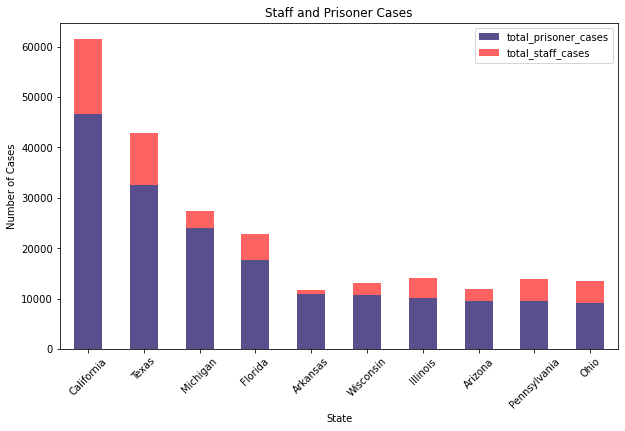

In [22]:
both_p_and_s_df.plot.bar(stacked=True, color={'total_staff_cases':'#ff6361', 'total_prisoner_cases':'#58508d'},
                         x = 'name', xlabel='State', ylabel='Number of Cases', rot=45, 
                         figsize = (10,6), title = 'Staff and Prisoner Cases');
plt.show();

### Comparing Staff Cases/Deaths with Prisoner Cases/Deaths Over time

In [23]:
complete_df.head()

name state  staff_tests  total_staff_cases  staff_recovered  \
268   Montana    MT          0.0                 -4              0.0   
39   Arkansas    AR          0.0                  0              0.0   
501   Wyoming    WY          6.0                  0              0.0   
190     Maine    ME          NaN                  0              0.0   
37   Arkansas    AR          0.0                  0              0.0   

     total_staff_deaths  prisoner_tests  total_prisoner_cases  \
268                   0             0.0                   113   
39                    1             0.0                   326   
501                   0            15.0                     0   
190                   0            12.0                     0   
37                    0          1252.0                  1257   

     prisoners_recovered  total_prisoner_deaths  ...  \
268                  0.0                      2  ...   
39                 822.0                      2  ...   
501                  0.0                      0  ...   
190                  0.0                      0  ...   
37                1427.0                      0  ...   

    Inmates participating in one or more work programs Prison industries  \
268                                             1669.0               1.0   
39                                             10739.0               0.0   
501                                             1001.0               0.0   
190                                             1921.0               5.0   
37                                             10739.0               0.0   

     Support services  Farming  Public works  Other work programs   \
268               5.0       1.0          1.0                   6.0   
39               24.0       2.0          7.0                   2.0   
501               5.0       2.0          3.0                   4.0   
190               5.0       4.0          4.0                   1.0   
37               24.0       2.0          7.0                   2.0   

     No work programs  phone_rate_avg  Latitude  Longitude  
268               2.0            2.04     47.00    -109.75  
39                1.0            4.80     34.75     -92.50  
501               0.0            3.20     43.00    -107.50  
190               0.0            4.33     45.50     -69.24  
37                1.0            4.80     34.75     -92.50  

[5 rows x 45 columns]

In [24]:
complete_df['as_of_date'] = pd.to_datetime(complete_df['as_of_date'])

In [25]:
complete_df['as_of_date_month_year'] = pd.to_datetime(complete_df['as_of_date_month_year'])

In [26]:
complete_df['as_of_date_month_year'].dtype

dtype('<M8[ns]')

In [27]:
civ_pris_df = complete_df[['name', 'total_staff_cases', 'total_staff_deaths', 'total_prisoner_cases', 'total_prisoner_deaths', 'as_of_date_month_year', 'region', 'month']]

<Figure size 576x432 with 0 Axes>

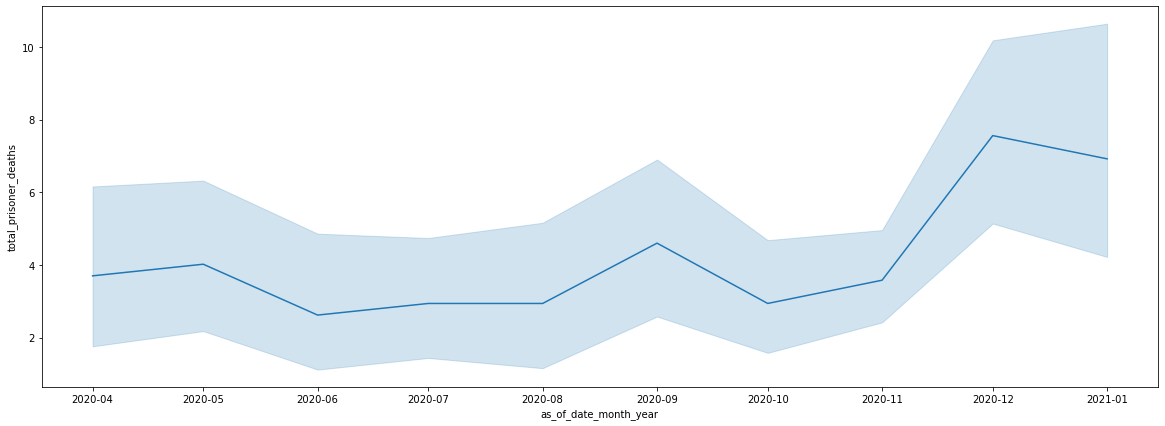

In [28]:
plt.figure(figsize=(8,6))


fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot(data = civ_pris_df, x = "as_of_date_month_year", y = 'total_prisoner_deaths');
plt.show();

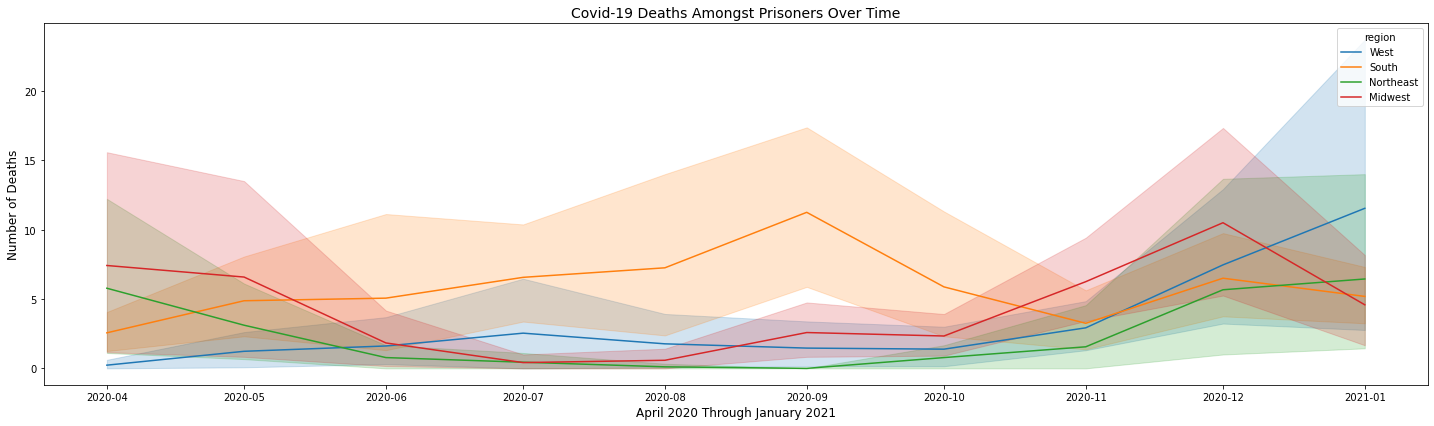

In [55]:
plt.figure(figsize=(20,6));
sns.lineplot(data = civ_pris_df, x = "as_of_date_month_year", y = 'total_prisoner_deaths', hue='region');

plt.title('Covid-19 Deaths Amongst Prisoners Over Time', size = 14)
plt.tight_layout()
plt.xlabel('April 2020 Through January 2021', size=12)
plt.ylabel('Number of Deaths', size = 12)
plt.savefig('prisoner_deaths_over_time.png', dpi=300)
plt.show();

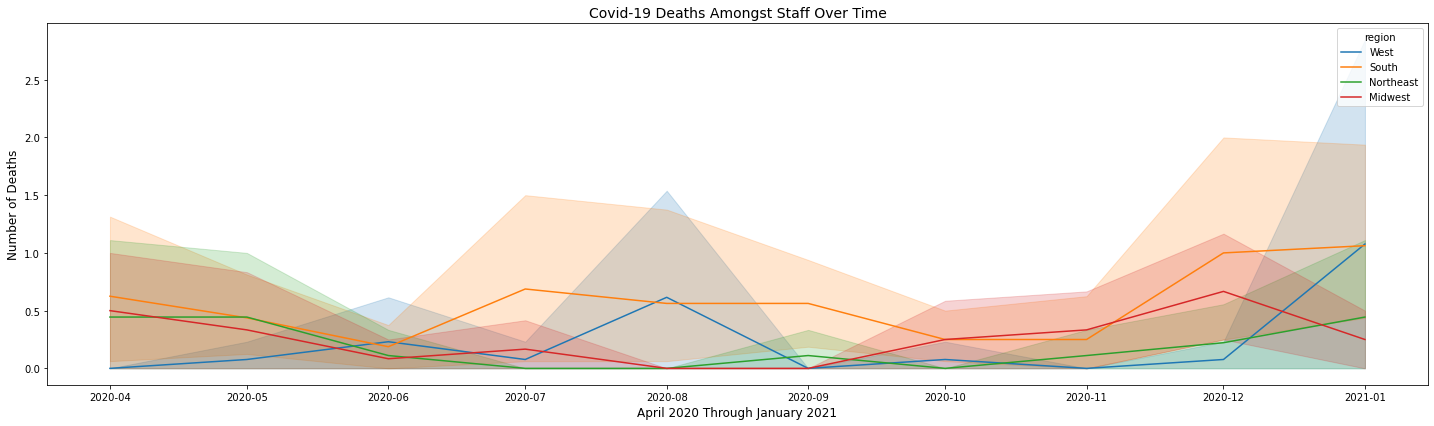

In [58]:
plt.figure(figsize=(20,6));

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

sns.lineplot(data = civ_pris_df, x = "as_of_date_month_year", y = 'total_staff_deaths', hue='region');

plt.title('Covid-19 Deaths Amongst Staff Over Time', size = 14)
plt.tight_layout()
plt.xlabel('April 2020 Through January 2021', size=12)
plt.ylabel('Number of Deaths', size = 12)
plt.savefig('staff_deaths_over_time.png', dpi=300)
plt.show();

<Figure size 720x576 with 0 Axes>

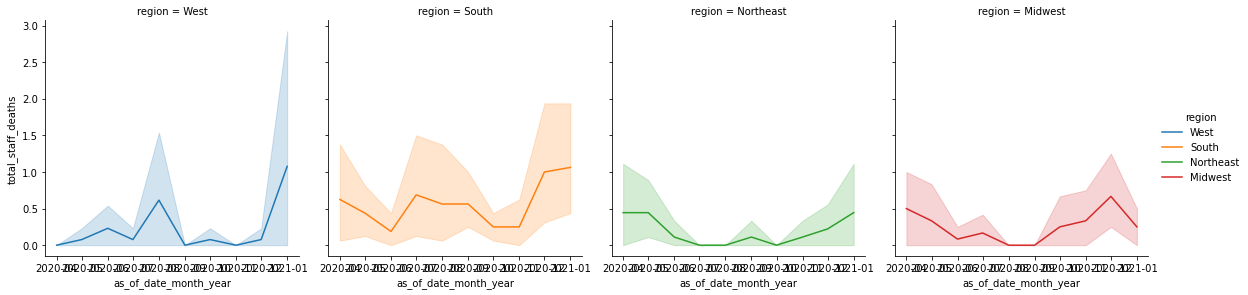

In [57]:
plt.figure(figsize=(10,8))

sns.relplot(
    data= civ_pris_df, x="as_of_date_month_year", y="total_staff_deaths", col="region", hue='region', kind="line", height = 4)

In [59]:
def to_month(num):
    num = int(num)
    if num == 1:
        return 'Jan'
    elif num == 2:
        return 'Feb'
    elif num == 3:
        return 'Mar'
    elif num == 4:
        return 'Apr'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'Jun'
    elif num == 7:
        return 'Jul'
    elif num == 8:
        return 'Aug'
    elif num == 9:
        return 'Sept'
    elif num == 10:
        return 'Oct'
    elif num == 11:
        return 'Nov'
    else:
        return 'Dec'

In [60]:
civ_pris_df['month'] = civ_pris_df['month'].map(to_month)

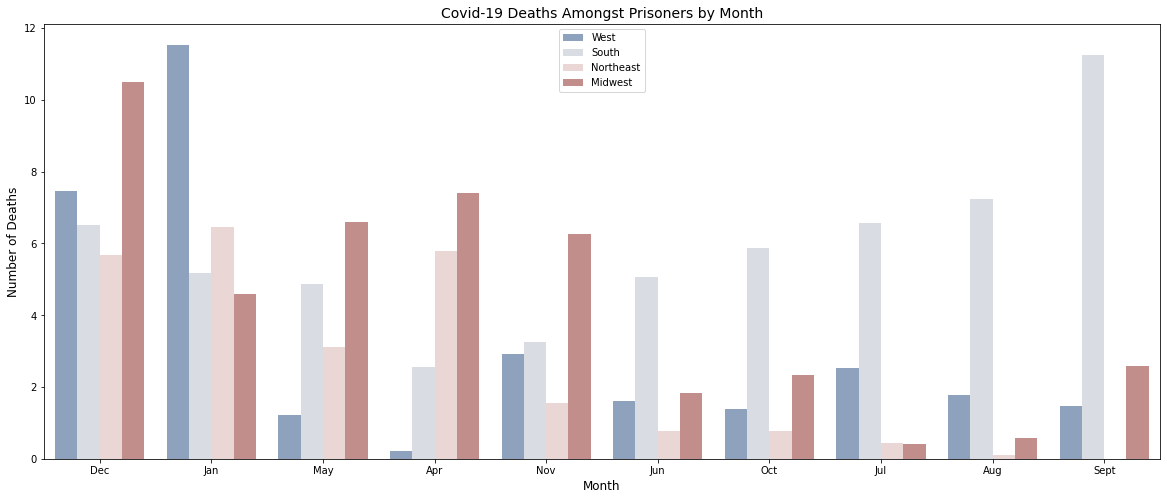

In [61]:
plt.figure(figsize=(20,8))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

#fig, axes = plt.subplots(figsize=(20,7))
total_covid_bargraph = sns.barplot(data = civ_pris_df, x = "month", y = 'total_prisoner_deaths', hue='region', palette= 'vlag', ci=None)



plt.title('Covid-19 Deaths Amongst Prisoners by Month', size = 14)

plt.xlabel('Month', size=12)
plt.ylabel('Number of Deaths', size = 12)
plt.legend(loc=0)
plt.show();


### Comparing Prisoner/Civilian Cases by Region

In [62]:
complete_df.head()

name state  staff_tests  total_staff_cases  staff_recovered  \
268   Montana    MT          0.0                 -4              0.0   
39   Arkansas    AR          0.0                  0              0.0   
501   Wyoming    WY          6.0                  0              0.0   
190     Maine    ME          NaN                  0              0.0   
37   Arkansas    AR          0.0                  0              0.0   

     total_staff_deaths  prisoner_tests  total_prisoner_cases  \
268                   0             0.0                   113   
39                    1             0.0                   326   
501                   0            15.0                     0   
190                   0            12.0                     0   
37                    0          1252.0                  1257   

     prisoners_recovered  total_prisoner_deaths  ...  \
268                  0.0                      2  ...   
39                 822.0                      2  ...   
501                  0.0                      0  ...   
190                  0.0                      0  ...   
37                1427.0                      0  ...   

    Inmates participating in one or more work programs Prison industries  \
268                                             1669.0               1.0   
39                                             10739.0               0.0   
501                                             1001.0               0.0   
190                                             1921.0               5.0   
37                                             10739.0               0.0   

     Support services  Farming  Public works  Other work programs   \
268               5.0       1.0          1.0                   6.0   
39               24.0       2.0          7.0                   2.0   
501               5.0       2.0          3.0                   4.0   
190               5.0       4.0          4.0                   1.0   
37               24.0       2.0          7.0                   2.0   

     No work programs  phone_rate_avg  Latitude  Longitude  
268               2.0            2.04     47.00    -109.75  
39                1.0            4.80     34.75     -92.50  
501               0.0            3.20     43.00    -107.50  
190               0.0            4.33     45.50     -69.24  
37                1.0            4.80     34.75     -92.50  

[5 rows x 45 columns]

In [63]:
region_df = complete_df[['name', 'state', 'total_prisoner_cases', 'total_prisoner_deaths', 'civ_cases', 'civ_death', 'region']]

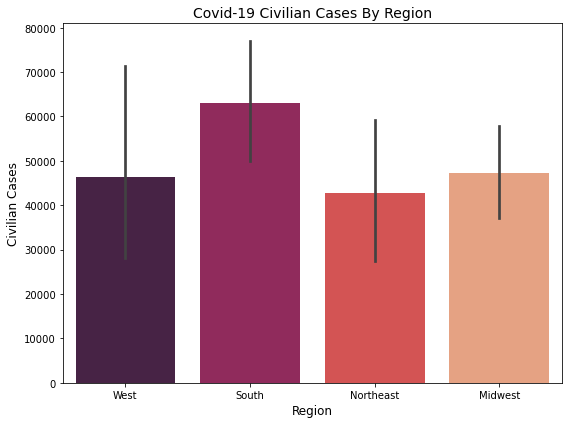

In [86]:
plt.figure(figsize=(8,6))
region_bargraph_civilian = sns.barplot(data = region_df, x = "region", y = 'civ_cases', palette='rocket')

plt.title('Covid-19 Civilian Cases By Region', size = 14)
plt.xlabel('Region', fontsize =12)
plt.ylabel('Civilian Cases', fontsize=12)
plt.tight_layout()
plt.savefig('civ_cases_region.png', dpi=300)

plt.show();

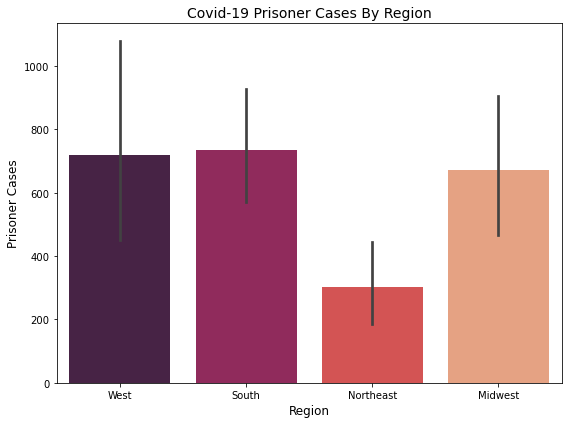

In [87]:
plt.figure(figsize=(8,6))
region_bargraph_civilian = sns.barplot(data = region_df, x = "region", y = 'total_prisoner_cases', palette='rocket')

plt.title('Covid-19 Prisoner Cases By Region', size = 14)
plt.xlabel('Region', fontsize =12)
plt.ylabel('Prisoner Cases', fontsize=12)
plt.tight_layout()
plt.savefig('prisoner_cases_region.png', dpi=300)
plt.show();

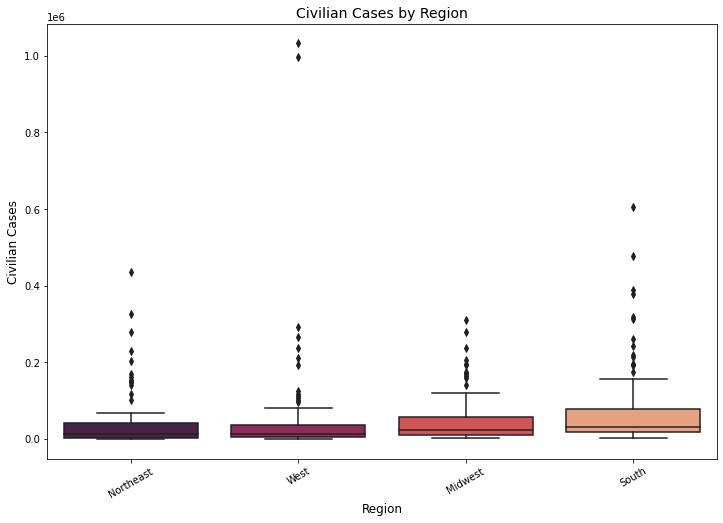

In [66]:
plt.figure(figsize=(12,8))
order1= region_df.groupby('region').mean()['civ_cases'].sort_values().index
sns.boxplot(x =region_df['region'], y =region_df['civ_cases'], order=order1, palette='rocket');
plt.xticks(rotation=30);

plt.title('Civilian Cases by Region', size = 14)

plt.xlabel('Region', size = 12)
plt.ylabel('Civilian Cases', size = 12)
plt.show();

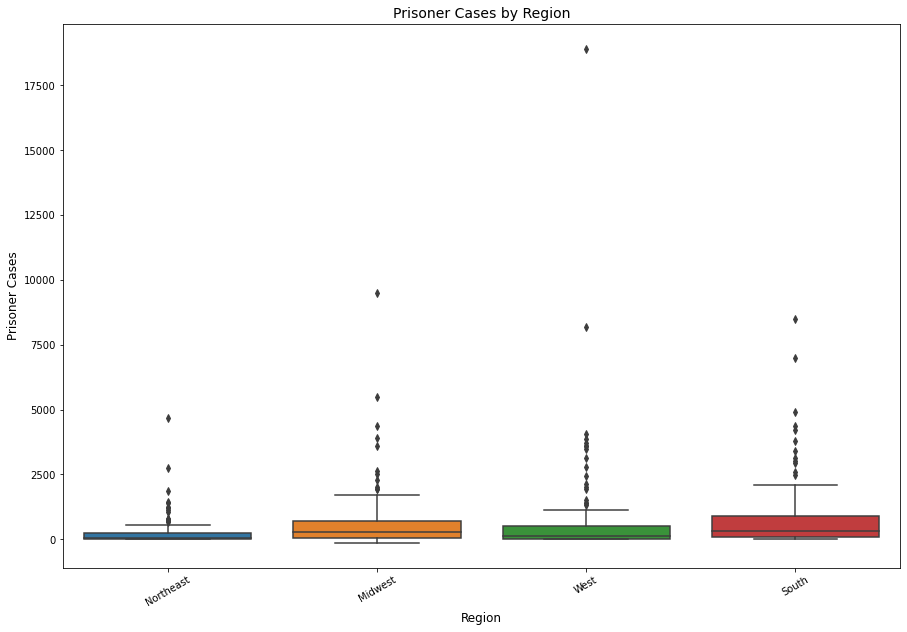

In [67]:
plt.figure(figsize=(15,10))
order2= region_df.groupby('region').mean()['total_prisoner_cases'].sort_values().index
sns.boxplot(x =region_df['region'], y =region_df['total_prisoner_cases'], order=order2);
plt.xticks(rotation=30);

plt.title('Prisoner Cases by Region', size = 14)

plt.xlabel('Region', size = 12)
plt.ylabel('Prisoner Cases', size = 12)
plt.show();

### Plotly Map

In [68]:
complete_df.head()

name state  staff_tests  total_staff_cases  staff_recovered  \
268   Montana    MT          0.0                 -4              0.0   
39   Arkansas    AR          0.0                  0              0.0   
501   Wyoming    WY          6.0                  0              0.0   
190     Maine    ME          NaN                  0              0.0   
37   Arkansas    AR          0.0                  0              0.0   

     total_staff_deaths  prisoner_tests  total_prisoner_cases  \
268                   0             0.0                   113   
39                    1             0.0                   326   
501                   0            15.0                     0   
190                   0            12.0                     0   
37                    0          1252.0                  1257   

     prisoners_recovered  total_prisoner_deaths  ...  \
268                  0.0                      2  ...   
39                 822.0                      2  ...   
501                  0.0                      0  ...   
190                  0.0                      0  ...   
37                1427.0                      0  ...   

    Inmates participating in one or more work programs Prison industries  \
268                                             1669.0               1.0   
39                                             10739.0               0.0   
501                                             1001.0               0.0   
190                                             1921.0               5.0   
37                                             10739.0               0.0   

     Support services  Farming  Public works  Other work programs   \
268               5.0       1.0          1.0                   6.0   
39               24.0       2.0          7.0                   2.0   
501               5.0       2.0          3.0                   4.0   
190               5.0       4.0          4.0                   1.0   
37               24.0       2.0          7.0                   2.0   

     No work programs  phone_rate_avg  Latitude  Longitude  
268               2.0            2.04     47.00    -109.75  
39                1.0            4.80     34.75     -92.50  
501               0.0            3.20     43.00    -107.50  
190               0.0            4.33     45.50     -69.24  
37                1.0            4.80     34.75     -92.50  

[5 rows x 45 columns]

In [69]:
import chart_studio.plotly as py
import plotly.graph_objects as go

In [70]:
color_map_df = complete_df[['state', 'total_staff_cases', 'total_staff_deaths', 'total_prisoner_cases', 'total_prisoner_deaths', 'as_of_date', 'region', 'month', 'Total_19']]

In [71]:
color_map = color_map_df.groupby('state')[['total_staff_cases', 'total_staff_deaths', 'total_prisoner_cases', 'total_prisoner_deaths']].sum()

In [72]:
color_map.reset_index(inplace=True)

In [73]:
color_map.head()

state  total_staff_cases  total_staff_deaths  total_prisoner_cases  \
0    AK                268                   0                  2294   
1    AL                949                   3                  1369   
2    AR                813                   4                 10905   
3    AZ               2377                   1                  9547   
4    CA              15003                  22                 46594   

   total_prisoner_deaths  
0                      5  
1                     60  
2                     52  
3                     47  
4                    187

In [74]:
for col in color_map.columns:
    color_map[col] = color_map[col].astype(str)
    
color_map['text'] = color_map['state'] + '<br>' + \
    'Prisoner Cases: '+ color_map['total_prisoner_cases'] + '<br>' + \
    'Prisoner Deaths: ' + color_map['total_prisoner_deaths'] + '<br>' + \
    'Staff Deaths: ' + color_map['total_staff_deaths'] + '<br>' + \
    'Staff Cases: ' + color_map['total_staff_cases'] + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=color_map['state'], # Spatial coordinates
    z = color_map['total_prisoner_cases'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    autocolorscale =False,
    text=color_map['text'], #hover text
    marker_line_color ='white', #line markers between states
    colorbar_title = "Prisoners with Covid-19 Cases",
))


fig.update_layout(
    title_text = '2020 Covid-19 Prisoner Cases by State (Hover for More Info)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

Analysis: At first glance, we see that the majority of prisoner Covid-19 cases are high in California, Texas, Florida and Michigan; however, we must take in consideration of the Covid-19 infection per capita rate amongst the prisoners.\

Will create another map that demonstrates the Covid-19 prisoner infection rate per capita below.

In [75]:
color_map_df2 = complete_df[['state', 'total_staff_cases', 'total_staff_deaths', 'total_prisoner_cases', 
                             'total_prisoner_deaths', 'as_of_date', 'region', 'month', 'Total_19']]

In [76]:
color_map_df2.head()

state  total_staff_cases  total_staff_deaths  total_prisoner_cases  \
268    MT                 -4                   0                   113   
39     AR                  0                   1                   326   
501    WY                  0                   0                     0   
190    ME                  0                   0                     0   
37     AR                  0                   0                  1257   

     total_prisoner_deaths as_of_date     region  month  Total_19  
268                      2 2020-12-30       West     12    4723.0  
39                       2 2021-01-26      South      1   17759.0  
501                      0 2020-05-29       West      5    2479.0  
190                      0 2020-04-29  Northeast      4    2185.0  
37                       0 2020-11-24      South     11   17759.0

In [77]:
color_map2 = color_map_df2.groupby('state')[['total_staff_cases', 'total_staff_deaths', 'total_prisoner_cases', 'total_prisoner_deaths', 'Total_19']].sum()

In [79]:
#Feature engineering two columns: prisoner_cases_per_cap and prisoner_deaths_per_cap
color_map2['prisoner_cases_per_cap'] = np.round(color_map2['total_prisoner_cases']/color_map2['Total_19'],4)
color_map2['prisoner_deaths_per_cap'] = np.round(color_map2['total_prisoner_deaths']/color_map2['Total_19'],4)

In [80]:
color_map2.reset_index(inplace=True)

In [81]:
#changing inf value to 0 in vermont
color_map2 = color_map2.replace([np.inf, -np.inf], 0)

In [90]:
for col in color_map2.columns:
    color_map2[col] = color_map2[col].astype(str)
    
color_map2['text'] = color_map2['state'] + '<br>' + \
    'Prisoner Cases: '+ color_map2['total_prisoner_cases'] + '<br>' + \
    'Prisoner Deaths: ' + color_map2['total_prisoner_deaths'] + '<br>' + \
    'Staff Deaths: ' + color_map2['total_staff_deaths'] + '<br>' + \
    'Staff Cases: ' + color_map2['total_staff_cases'] + '<br>' + \
    'Prisoner Cases (per Capita): ' + color_map2['prisoner_cases_per_cap'] + '<br>' + \
    'Prisoner Deaths (per Capita): ' + color_map2['prisoner_deaths_per_cap']

fig = go.Figure(data=go.Choropleth(
    locations=color_map2['state'], # Spatial coordinates
    z = color_map2['prisoner_cases_per_cap'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    autocolorscale =False,
    text=color_map2['text'], #hover text
    marker_line_color ='white', #line markers between states
    colorbar_title = "COVID-19 Prisoner Cases (per Capita)",
))


fig.update_layout(
    title_text = '2020 Covid-19 Prisoner Cases (per Capita - Hover for Breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

We see a higher covid infection rate in states such as South Dakota, Michigan and Arkansas

In [83]:
for col in color_map2.columns:
    color_map2[col] = color_map2[col].astype(str)
    
color_map2['text'] = color_map2['state'] + '<br>' + \
    'Prisoner Cases: '+ color_map2['total_prisoner_cases'] + '<br>' + \
    'Prisoner Deaths: ' + color_map2['total_prisoner_deaths'] + '<br>' + \
    'Staff Deaths: ' + color_map2['total_staff_deaths'] + '<br>' + \
    'Staff Cases: ' + color_map2['total_staff_cases'] + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=color_map2['state'], # Spatial coordinates
    z = color_map2['prisoner_deaths_per_cap'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    autocolorscale =False,
    text=color_map2['text'], #hover text
    marker_line_color ='white', #line markers between states
    colorbar_title = "COVID-19 Prisoner Deaths per Capita",
))


fig.update_layout(
    title_text = '2020 Covid-19 Prisoner Deaths per Capita (Hover for Breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()